In [2]:
import IPython
import sys
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime
import matplotlib.pyplot as plt
import math
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/jiaqi/Downloads/subscriptionsdataFINAL.csv')
#Converting to datetime
df['Join Date'] =  pd.to_datetime(df['Join Date'].str.upper(), format='%b-%y', yearfirst=False)
df['End Date'] =  pd.to_datetime(df['End Date'].str.upper(), format='%b-%y', yearfirst=False)
df['join_year'] = df['Join Date'].dt.year

In [4]:
#Duration Calculation
date_min = min (df['Join Date'].min(),df['End Date'].min() )
date_max = max (df['Join Date'].max(),df['End Date'].max() )
dates = pd.date_range(date_min, date_max, freq = 'MS')
df['Duration'] = np.where(df['End Date'].isna(), 
                                     (date_max - df['Join Date']), 
                                     (df['End Date'] - df['Join Date']) )
df['Duration'] = (df['Duration'] /  np.timedelta64(1, 'M') ).apply(math.floor)
df

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,join_year,Duration
0,Enfield,2011-12-01,C1,Male,Standard,2011-12-01,1,1992,2011,0
1,Greenwich,2018-06-01,A,Female,Standard,NaT,2,1972,2018,6
2,Islington,2018-03-01,B,Female,Standard,2018-10-01,3,1985,2018,7
3,Hounslow,2015-10-01,C1,Female,Standard,2015-12-01,4,1972,2015,2
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,7
...,...,...,...,...,...,...,...,...,...,...
850028,Lewisham,2018-12-01,A,Male,Standard,NaT,850029,1995,2018,0
850029,Tower Hamlets,2013-10-01,B,Male,Standard,2014-02-01,850030,1987,2013,4
850030,Redbridge,2018-05-01,C1,Female,Standard,2018-09-01,850031,1985,2018,4
850031,Camden,2017-07-01,B,Female,Standard,2017-09-01,850032,1978,2017,2


In [5]:
#Calculating age
df['age'] = df['join_year'] - df['BirthYear'] 
bins = [18, 30, 40, 50, 60, 70]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']
df['agerange'] = pd.cut(df.age, bins, labels = labels,include_lowest = True)

In [6]:
#Visitation data part 1
df1 = pd.read_csv('C:/Users/jiaqi/Downloads/visitationdataPART1.csv')

In [7]:
#Visitation data part 2
df2 = pd.read_csv('C:/Users/jiaqi/Downloads/visitationdataPART2.csv')

In [8]:
#Joining visitation files
visitdf = pd.concat([df1, df2], axis=0, join='inner')
#Changing vsitdate to datetime
visitdf['visitdate'] =  pd.to_datetime(visitdf['visitdate'].str.upper(), format='%d/%m/%Y', yearfirst=False)
visitdf

,CustomerID,visitdate,TimeofVisit,peakvisits
0,126444,2009-05-01,05:45,False
1,456610,2009-05-01,05:45,False
2,293763,2009-05-01,06:00,False
3,151253,2009-05-01,06:15,False
4,476569,2009-05-01,06:15,False
...,...,...,...,...
1048570,443779,2015-09-27,08:45,True
1048571,114663,2015-09-27,08:45,True
1048572,290981,2015-09-27,08:45,True
1048573,20102,2015-09-27,08:45,True


In [11]:
df1=pd.merge( left= df, right= visitdf, left_on='CustomerID', right_on='CustomerID')

In [44]:
#Classigying type of customer
def classify_type_of_customer(Duration):
    if Duration <= 3:
        return 'spur_of_the_moment'
    elif 3 <= Duration < 12:
        return 'normal_customer'
    else:
        return 'loyalty_customer'
    

df1['Type_of_Customer'] = df1['Duration'].apply(lambda x : classify_type_of_customer(x))
u = df1.select_dtypes(include=['datetime'])
df1[u.columns] = u.fillna(date_max)
df1

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,join_year,Duration,age,agerange,visitdate,TimeofVisit,peakvisits,Type_of_Customer
0,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,7,33,25-34,2015-08-19,17:00,False,normal_customer
1,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,7,33,25-34,2015-08-22,08:15,True,normal_customer
2,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,7,33,25-34,2015-08-30,18:15,True,normal_customer
3,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,7,33,25-34,2015-08-31,08:45,True,normal_customer
4,Barnet,2015-05-01,C2,Male,Standard,2015-12-01,5,1982,2015,7,33,25-34,2015-09-02,07:45,True,normal_customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097145,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994,2014,20,20,18-24,2015-09-16,20:30,False,loyalty_customer
2097146,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994,2014,20,20,18-24,2015-09-17,19:45,True,loyalty_customer
2097147,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994,2014,20,20,18-24,2015-09-18,08:30,True,loyalty_customer
2097148,Havering,2014-04-01,C2,Female,Standard,2015-12-01,850022,1994,2014,20,20,18-24,2015-09-19,11:45,False,loyalty_customer


In [75]:
#New memberships over the years by gender
gender_type=df.groupby(['join_year', 'Gender']).size().to_frame('Count').reset_index()
gender_type.set_index('join_year')
pivot_df = gender_type.pivot(index= 'join_year', columns='Gender', values='Count')
pivot_df['female']= pivot_df['Female'] / (pivot_df['Female']+pivot_df['Male'])
pivot_df['male']= pivot_df['Male'] / (pivot_df['Female']+pivot_df['Male'])
pivot_df

Gender,Female,Male,female,male
join_year,,,,
2009,4313,4726,0.477155,0.522845
2010,11116,12001,0.480858,0.519142
2011,23278,24516,0.487049,0.512951
2012,29215,31289,0.482861,0.517139
2013,38257,41534,0.479465,0.520535
2014,43702,47728,0.477983,0.522017
2015,52943,56936,0.481830,0.518170
2016,63502,68542,0.480915,0.519085
2017,69668,75902,0.478588,0.521412


<AxesSubplot:xlabel='join_year'>

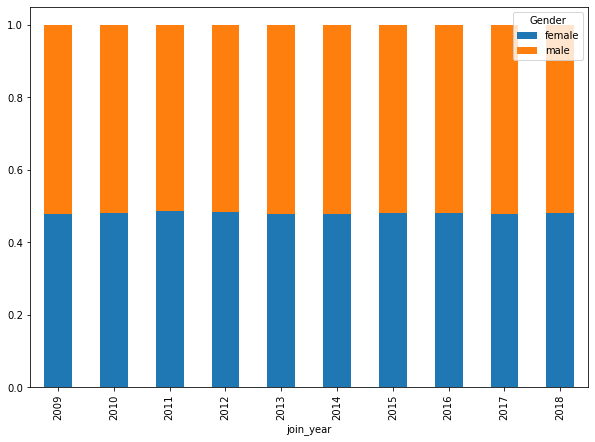

In [69]:
pivot_df.loc[:,['female','male']].plot.bar(stacked=True, figsize=(10,7))

In [71]:
#New memberships over the years by subscription type
sub_type=df.groupby(['join_year', 'Subscription Type']).size().to_frame('Count').reset_index()
sub_type.set_index('join_year')
pivot2 = sub_type.pivot(index= 'join_year', columns='Subscription Type', values='Count')
pivot2['standard']= pivot2['Standard'] / (pivot2['Standard']+pivot2['Flexible'])
pivot2['flexible']= pivot2['Flexible'] / (pivot2['Flexible']+pivot2['Standard'])
pivot2

Subscription Type,Flexible,Standard,standard,flexible
join_year,,,,
2009,1989,7050,0.779954,0.220046
2010,5048,18069,0.781633,0.218367
2011,10304,37490,0.784408,0.215592
2012,13136,47368,0.782890,0.217110
2013,17237,62554,0.783973,0.216027
2014,19795,71635,0.783496,0.216504
2015,23962,85917,0.781924,0.218076
2016,28516,103528,0.784042,0.215958
2017,31370,114200,0.784502,0.215498


<AxesSubplot:xlabel='join_year'>

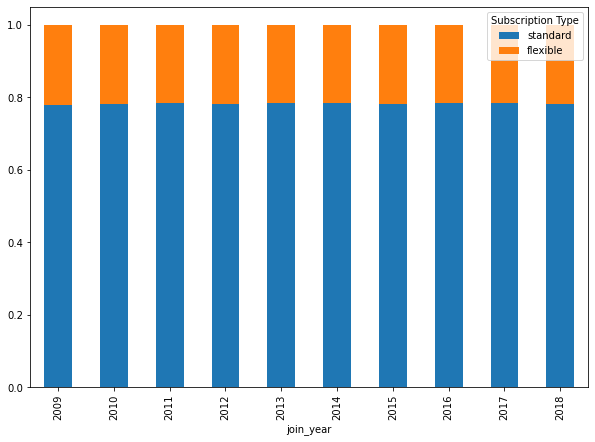

In [72]:
pivot2.loc[:,['standard','flexible']].plot.bar(stacked=True, figsize=(10,7))

In [73]:
#New memberships over the years by affluence
aff_type= df.groupby(['join_year', 'Affluence']).size().to_frame('Count').reset_index()
aff_type.set_index('join_year')
pivot3 = aff_type.pivot(index= 'join_year', columns='Affluence', values='Count')
pivot3['A']= pivot3['A'] / (pivot3['A']+pivot3['B']+pivot3['C1']+pivot3['C2']+pivot3['DE'])
pivot3['B']= pivot3['B'] / (pivot3['A']+pivot3['B']+pivot3['C1']+pivot3['C2']+pivot3['DE'])
pivot3['C1']= pivot3['C1'] / (pivot3['A']+pivot3['B']+pivot3['C1']+pivot3['C2']+pivot3['DE'])
pivot3['C2']= pivot3['C2'] / (pivot3['A']+pivot3['B']+pivot3['C1']+pivot3['C2']+pivot3['DE'])
pivot3['DE']= pivot3['DE'] / (pivot3['A']+pivot3['B']+pivot3['C1']+pivot3['C2']+pivot3['DE'])
pivot3

Affluence,A,B,C1,C2,DE
join_year,,,,,
2009,0.178670,0.500257,0.684241,0.909275,0.978816
2010,0.170264,0.515923,0.693971,0.879545,0.993417
2011,0.170042,0.524086,0.683893,0.886673,0.996656
2012,0.170005,0.520927,0.687153,0.889553,0.997275
2013,0.167563,0.516116,0.685486,0.881262,0.998127
2014,0.171027,0.519400,0.680463,0.892755,0.998188
2015,0.168449,0.518495,0.686999,0.888074,0.998533
2016,0.169610,0.519735,0.691123,0.889811,0.998734
2017,0.167679,0.520109,0.690777,0.893140,0.998818


<AxesSubplot:xlabel='join_year'>

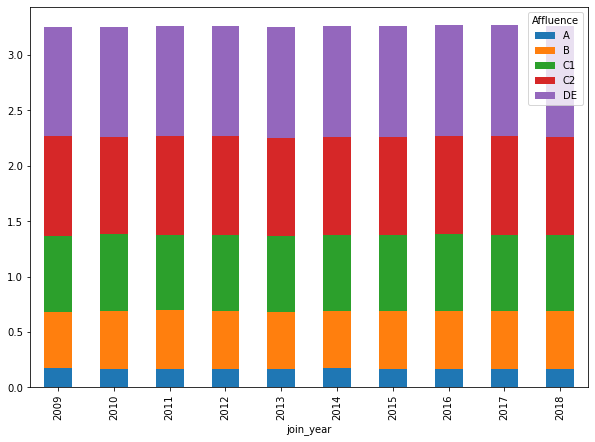

In [74]:
pivot3.loc[:,['A','B', 'C1','C2', 'DE']].plot.bar(stacked=True, figsize=(10,7))

In [79]:
date_min = min (df['Join Date'].min(),df['End Date'].min() )
date_max = max (df['Join Date'].max(),df['End Date'].max() )
dates = pd.date_range(date_min, date_max, freq = 'MS')
customers_total = pd.DataFrame({'Date':dates})
customers_total.head(), customers_total.shape
df['Duration'] = np.where(df['End Date'].isna(), 
                                     (date_max - df['Join Date']), 
                                     (df['End Date'] - df['Join Date']) )
df['Duration'] = (df['Duration'] /  np.timedelta64(1, 'M') ).apply(math.floor)

In [81]:
members_count =  [0] * len(dates)
def add_count(join_date,duration, dates, members_count):
    index = (dates == join_date).argmax()
    for i in range(index,index + duration+1):
        members_count[i] = members_count[i] +1 
    return members_count
df.apply(lambda row: add_count(row['Join Date'], row['Duration'],
                                          dates, members_count), axis=1)

0         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
1         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
2         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
3         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
4         [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
                                ...                        
850028    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850029    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850030    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850031    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
850032    [699, 1203, 2309, 3082, 3714, 4584, 5420, 5837...
Length: 850033, dtype: object

In [82]:
data = {"Date":dates,"Total_members":members_count}
members_count_by_month = pd.DataFrame(data)

In [83]:
# Looking at behaviour by subscription type
pd.options.mode.chained_assignment = None
stypedata= df.groupby(['Join Date','Subscription Type']).size().to_frame('Count').reset_index()
stypedata['Date'] = stypedata['Join Date']
stypedata = stypedata.drop('Join Date', axis=1)
stypedata.set_index('Date')
stype=pd.merge( left= stypedata, right= members_count_by_month, on='Date')

In [84]:
#% change in new memberships 3 months before and after price change by subscription Type
after=stype[stype['Date'] == '2016-04-01']
prior=stype[stype['Date'] == '2015-10-01']
#% change in new memberships 3 months before and after price change by subscription Type
after=stype[stype['Date'] == '2016-04-01']
prior=stype[stype['Date'] == '2015-10-01']
#prior['percentage'] = prior['Count'] / prior['Total_members']
#after['percentage '] = after['Count'] / after['Total_members']
prior.loc[:,'percentage'] = prior['Count']/ prior['Total_members']
after.loc[:,'percentage'] = after['Count']/ after['Total_members']
#after
combined = pd.concat([prior, after], axis=0, join='inner')
combined
combined.set_index('Subscription Type')
pivot_c = combined.pivot(index= 'Subscription Type', columns='Date', values='percentage')
pivot_c['% change']= pivot_c['2016-04-01'] - pivot_c['2015-10-01']
plotdata2=pivot_c.reset_index()

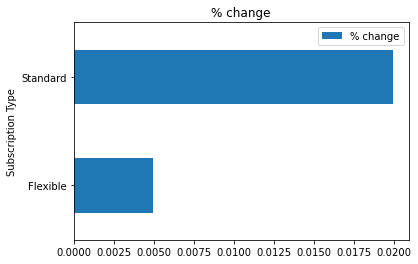

In [85]:
plotdata2.plot.barh(x='Subscription Type', y='% change', title="% change");

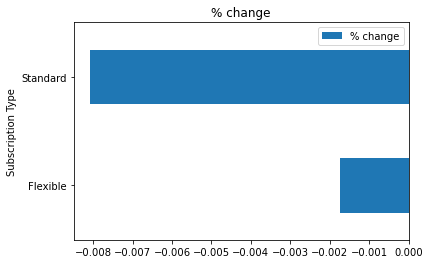

In [86]:
#% change proportion of new member 1 months before and after price change by subscription Type
after1=stype[stype['Date'] == '2016-02-01']
prior1=stype[stype['Date'] == '2015-12-01']
#prior['percentage'] = prior['Count'] / prior['Total_members']
#after['percentage '] = after['Count'] / after['Total_members']
prior1.loc[:,'percentage'] = prior1['Count']/ prior1['Total_members']
after1.loc[:,'percentage'] = after1['Count']/ after1['Total_members']
#after
combined1 = pd.concat([prior1, after1], axis=0, join='inner')
combined1
combined1.set_index('Subscription Type')
pivot_c1 = combined1.pivot(index= 'Subscription Type', columns='Date', values='percentage')
pivot_c1['% change']= pivot_c1['2016-02-01'] - pivot_c1['2015-12-01']
plotdata3=pivot_c1.reset_index()
#sns.catplot(x= "% change", y="Subscription Type", kind="bar", data=plotdata3)
plotdata3.plot.barh(x='Subscription Type', y='% change', title="% change");

In [88]:
# Behaviour changes in age groups
pd.options.mode.chained_assignment = None
stypedata= df.groupby(['Join Date','agerange']).size().to_frame('Count').reset_index()
stypedata['Date'] = stypedata['Join Date']
stypedata = stypedata.drop('Join Date', axis=1)
stypedata.set_index('Date')
stype=pd.merge( left= stypedata, right= members_count_by_month, on='Date')

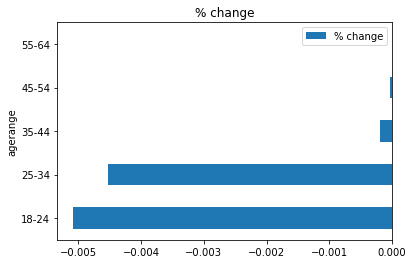

In [90]:
#% change in proportion new members 1 months before and after price change by subscription Type
after_age=stype[stype['Date'] == '2016-02-01']
prior_age=stype[stype['Date'] == '2015-12-01']
#prior['percentage'] = prior['Count'] / prior['Total_members']
#after['percentage '] = after['Count'] / after['Total_members']
prior_age.loc[:,'percentage'] = prior_age['Count']/ prior_age['Total_members']
after_age.loc[:,'percentage'] = after_age['Count']/ after_age['Total_members']
#after
combined_age = pd.concat([prior_age, after_age], axis=0, join='inner')
combined_age
combined_age.set_index('agerange')
pivot_a = combined_age.pivot(index= 'agerange', columns='Date', values='percentage')
pivot_a['% change']= pivot_a['2016-02-01'] - pivot_a['2015-12-01']
plotdata_age=pivot_a.reset_index()
plotdata_age
plotdata_age.plot.barh(x='agerange', y='% change', title="% change");

In [92]:
# Behaviour changes in affluence groups
pd.options.mode.chained_assignment = None
stypedata= df.groupby(['Join Date','Affluence']).size().to_frame('Count').reset_index()
stypedata['Date'] = stypedata['Join Date']
stypedata = stypedata.drop('Join Date', axis=1)
stypedata.set_index('Date')
stype=pd.merge( left= stypedata, right= members_count_by_month, on='Date')

In [93]:
#% change in proportion of new members 1 months before and after price change by Affluence Type
after_aff=stype[stype['Date'] == '2016-02-01']
prior_aff=stype[stype['Date'] == '2015-12-01']
#prior['percentage'] = prior['Count'] / prior['Total_members']
#after['percentage '] = after['Count'] / after['Total_members']
prior_aff.loc[:,'percentage'] = prior_aff['Count']/ prior_aff['Total_members']
after_aff.loc[:,'percentage'] = after_aff['Count']/ after_aff['Total_members']
#after
combined_aff = pd.concat([prior_aff, after_aff], axis=0, join='inner')
combined_aff
combined_aff.set_index('Affluence')
pivot_aff = combined_aff.pivot(index= 'Affluence', columns='Date', values='percentage')
pivot_aff['% change']= pivot_aff['2016-02-01'] - pivot_aff['2015-12-01']
plotdata_aff=pivot_aff.reset_index()
plotdata_aff

Date,Affluence,2015-12-01 00:00:00,2016-02-01 00:00:00,% change
0,A,0.039457,0.039724,0.000267
1,B,0.104864,0.100047,-0.004817
2,C1,0.066889,0.063813,-0.003076
3,C2,0.026988,0.024782,-0.002205
4,DE,0.003580,0.003579,-0.000002


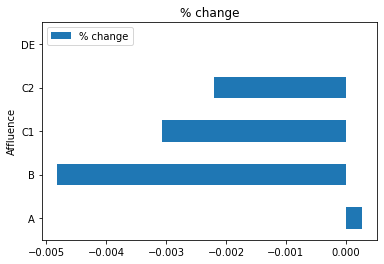

In [94]:
plotdata_aff.plot.barh(x='Affluence', y='% change', title="% change");

## Exploring Behaviour of those who leave within 3 months

In [ ]:
#Group by customers type group and peakvisits
visits= df1.groupby(['Type_of_Customer', 'peakvisits']).size().to_frame('Count').reset_index()
#Pivoting the data
pivot_df = visits.pivot(index= 'peakvisits', columns='Type_of_Customer', values='Count')

#Cacluating proportion of customer in each time that visits peak vs none peak
pivot_df['loyal']= pivot_df['loyalty_customer'] / (pivot_df['loyalty_customer']+pivot_df['spur_of_the_moment']+ pivot_df['normal_customer'])
pivot_df['normal']= pivot_df['normal_customer'] / (pivot_df['loyalty_customer']+pivot_df['spur_of_the_moment']+ pivot_df['normal_customer'])
pivot_df['spur of the moment']= pivot_df['spur_of_the_moment'] / (pivot_df['loyalty_customer']+pivot_df['spur_of_the_moment']+ pivot_df['normal_customer'])
pivot_df

<AxesSubplot:xlabel='peakvisits'>

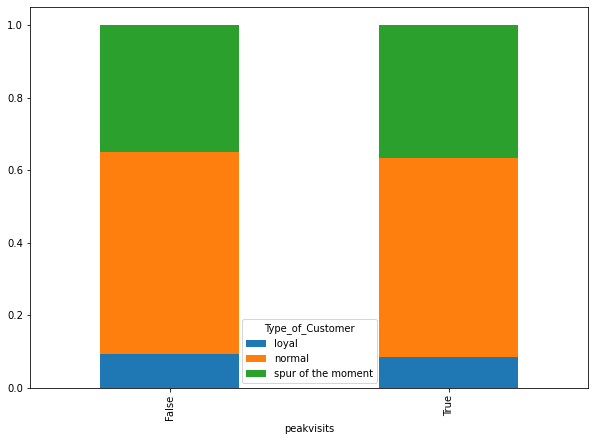

In [56]:
pivot_df.loc[:,['loyal','normal','spur of the moment']].plot.bar(stacked=True, figsize=(10,7))

In [57]:
#Filtering for total that visits in different time 
visittime= df1.groupby(['TimeofVisit']).size().to_frame('Count').reset_index()
visittime

,TimeofVisit,Count
0,00:00,3118
1,05:00,802
2,05:15,3968
3,05:30,6169
4,05:45,7141
...,...,...
72,22:45,13125
73,23:00,11129
74,23:15,8946
75,23:30,7270


In [59]:
#converting time to date time
#times = pd.to_datetime(visittime.TimeofVisit)
visittime['TimeofVisit'] = pd.to_datetime(visittime['TimeofVisit'])
df3=visittime.set_index('TimeofVisit')
df4=df3.resample('60min', label='right').first()
dff=df4.reset_index()
#Calculating times in terms of hour 
dff['time_hour'] = dff['TimeofVisit'].dt.hour
dff

,TimeofVisit,Count,time_hour
0,2021-01-22 01:00:00,3118.0,1
1,2021-01-22 02:00:00,NaN,2
2,2021-01-22 03:00:00,NaN,3
3,2021-01-22 04:00:00,NaN,4
4,2021-01-22 05:00:00,NaN,5
5,2021-01-22 06:00:00,802.0,6
6,2021-01-22 07:00:00,11036.0,7
7,2021-01-22 08:00:00,56814.0,8
8,2021-01-22 09:00:00,89231.0,9
9,2021-01-22 10:00:00,34561.0,10


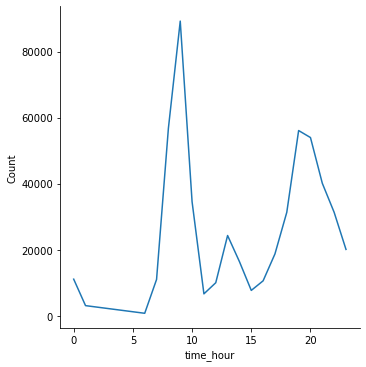

In [60]:
# Plot for total that visits in different hours 
sns.relplot(x="time_hour", y="Count", kind="line", data=dff)
plt.show()

In [61]:
# Visitation times by type of customer
visits= df1.groupby(['TimeofVisit', 'Type_of_Customer','Subscription Type']).size().to_frame('Count').reset_index()
visits['TimeofVisit'] = pd.to_datetime(visits['TimeofVisit'])
visits['time_hour'] = visits['TimeofVisit'].dt.hour
visits

,TimeofVisit,Type_of_Customer,Subscription Type,Count,time_hour
0,2021-01-22 00:00:00,loyalty_customer,Flexible,5,0
1,2021-01-22 00:00:00,loyalty_customer,Standard,344,0
2,2021-01-22 00:00:00,normal_customer,Flexible,144,0
3,2021-01-22 00:00:00,normal_customer,Standard,1649,0
4,2021-01-22 00:00:00,spur_of_the_moment,Flexible,214,0
...,...,...,...,...,...
457,2021-01-22 23:45:00,loyalty_customer,Standard,695,23
458,2021-01-22 23:45:00,normal_customer,Flexible,269,23
459,2021-01-22 23:45:00,normal_customer,Standard,3447,23
460,2021-01-22 23:45:00,spur_of_the_moment,Flexible,420,23


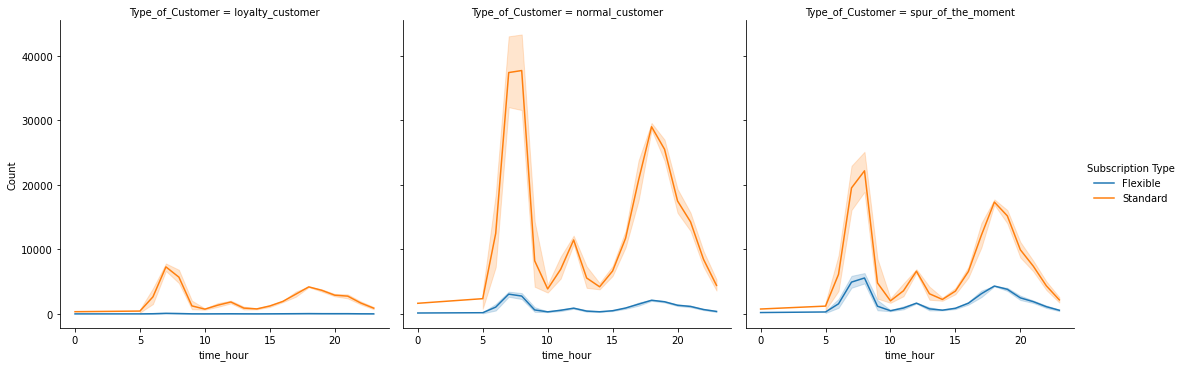

In [62]:
sns.relplot(x="time_hour", y="Count", hue="Subscription Type",col="Type_of_Customer", kind="line", data=visits)
plt.show()

In [14]:
df_leave = df1[df1['Duration'] <= 3]
df_leave

,Club,Join Date,Affluence,Gender,Subscription Type,End Date,CustomerID,BirthYear,join_year,Duration,age,agerange,visitdate,TimeofVisit,peakvisits,Type_of_Customer
16,Camden,2015-07-01,A,Female,Standard,2015-10-01,21,1990,2015,3,25,18-24,2015-08-16,19:00,True,spur_of_the_moment
17,Camden,2015-07-01,A,Female,Standard,2015-10-01,21,1990,2015,3,25,18-24,2015-08-17,19:15,True,spur_of_the_moment
18,Camden,2015-07-01,A,Female,Standard,2015-10-01,21,1990,2015,3,25,18-24,2015-08-20,07:45,True,spur_of_the_moment
19,Camden,2015-07-01,A,Female,Standard,2015-10-01,21,1990,2015,3,25,18-24,2015-08-21,17:45,False,spur_of_the_moment
20,Camden,2015-07-01,A,Female,Standard,2015-10-01,21,1990,2015,3,25,18-24,2015-08-23,12:30,True,spur_of_the_moment
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097068,Newham,2015-07-01,B,Male,Flexible,2015-10-01,849996,1986,2015,3,29,18-24,2015-09-15,16:45,False,spur_of_the_moment
2097069,Newham,2015-07-01,B,Male,Flexible,2015-10-01,849996,1986,2015,3,29,18-24,2015-09-18,18:30,True,spur_of_the_moment
2097070,Newham,2015-07-01,B,Male,Flexible,2015-10-01,849996,1986,2015,3,29,18-24,2015-09-20,12:45,True,spur_of_the_moment
2097071,Newham,2015-07-01,B,Male,Flexible,2015-10-01,849996,1986,2015,3,29,18-24,2015-09-22,07:30,True,spur_of_the_moment


In [15]:
# Visitation time by Gender
gender= df_leave.groupby(['TimeofVisit', 'Gender']).size().to_frame('Count').reset_index()
gender['TimeofVisit'] = pd.to_datetime(gender['TimeofVisit'])
gender['time_hour'] = gender['TimeofVisit'].dt.hour
gender

,TimeofVisit,Gender,Count,time_hour
0,2021-01-22 00:00:00,Female,460,0
1,2021-01-22 00:00:00,Male,516,0
2,2021-01-22 05:00:00,Female,158,5
3,2021-01-22 05:00:00,Male,154,5
4,2021-01-22 05:15:00,Female,614,5
...,...,...,...,...
149,2021-01-22 23:15:00,Male,1481,23
150,2021-01-22 23:30:00,Female,1165,23
151,2021-01-22 23:30:00,Male,1200,23
152,2021-01-22 23:45:00,Female,1043,23


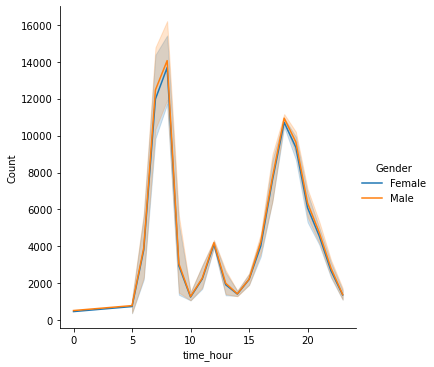

In [16]:
#plot
sns.relplot(x="time_hour", y="Count", hue="Gender", kind="line", data=gender)
plt.show()

In [17]:
#Visitation time by Affluence
aff= df_leave.groupby(['TimeofVisit', 'Affluence','Subscription Type']).size().to_frame('Count').reset_index()
aff['TimeofVisit'] = pd.to_datetime(aff['TimeofVisit'])
aff['time_hour'] = aff['TimeofVisit'].dt.hour
aff

,TimeofVisit,Affluence,Subscription Type,Count,time_hour
0,2021-01-22 00:00:00,A,Flexible,33,0
1,2021-01-22 00:00:00,A,Standard,120,0
2,2021-01-22 00:00:00,B,Flexible,84,0
3,2021-01-22 00:00:00,B,Standard,311,0
4,2021-01-22 00:00:00,C1,Flexible,70,0
...,...,...,...,...,...
764,2021-01-22 23:45:00,C1,Standard,450,23
765,2021-01-22 23:45:00,C2,Flexible,47,23
766,2021-01-22 23:45:00,C2,Standard,183,23
767,2021-01-22 23:45:00,DE,Flexible,9,23


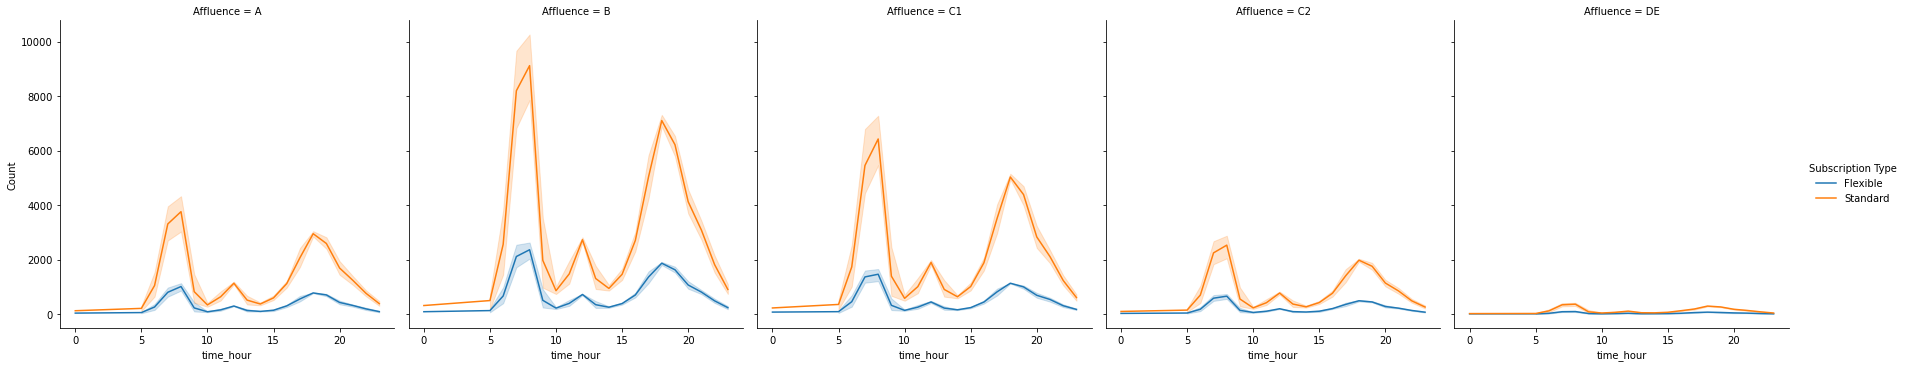

In [18]:
sns.relplot(x="time_hour", y="Count", hue="Subscription Type",col="Affluence", kind="line", data=aff)
plt.show()

In [19]:
#Visitation times by age
agedata= df_leave.groupby(['TimeofVisit', 'agerange','Subscription Type']).size().to_frame('Count').reset_index()
agedata['TimeofVisit'] = pd.to_datetime(agedata['TimeofVisit'])
agedata['time_hour'] = agedata['TimeofVisit'].dt.hour
agedata

,TimeofVisit,agerange,Subscription Type,Count,time_hour
0,2021-01-22 00:00:00,18-24,Flexible,109,0
1,2021-01-22 00:00:00,18-24,Standard,394,0
2,2021-01-22 00:00:00,25-34,Flexible,76,0
3,2021-01-22 00:00:00,25-34,Standard,290,0
4,2021-01-22 00:00:00,35-44,Flexible,28,0
...,...,...,...,...,...
765,2021-01-22 23:45:00,35-44,Standard,162,23
766,2021-01-22 23:45:00,45-54,Flexible,1,23
767,2021-01-22 23:45:00,45-54,Standard,10,23
768,2021-01-22 23:45:00,55-64,Flexible,0,23


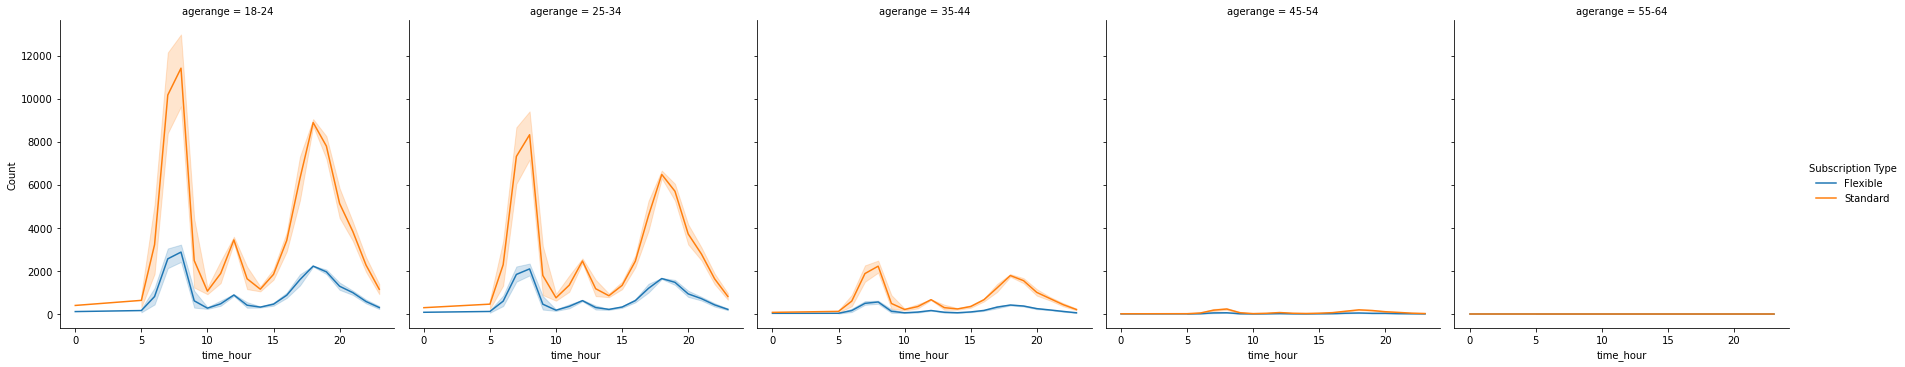

In [20]:
sns.relplot(x="time_hour", y="Count", hue="Subscription Type",col="agerange", kind="line", data=agedata)
plt.show()